Load the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    "EmployeeId","FirstName", "LastName", "HireDate", "BirthDate",
     "Sales", "Revenue", "Avg Revenue per Invoice"
]

# Read the CSV and assign column names
df = pd.read_csv("newdb.csv", header=None, names=columns, sep=";")

df

,EmployeeId,FirstName,LastName,HireDate,BirthDate,Sales,Revenue,Avg Revenue per Invoice
0,3,Jane,Peacock,2002-04-01,1973-08-29,146,833.04,5.705753
1,4,Margaret,Park,2003-05-03,1947-09-19,140,775.40,5.538571
2,5,Steve,Johnson,2003-10-17,1965-03-03,126,720.16,5.715555
3,9,JoLynn,Dobney,2007-07-26,1955-08-16,16,85.65,5.353125
4,10,Ruth,Ellerbrock,2007-08-06,1956-01-03,20,101.78,5.089000
...,...,...,...,...,...,...,...,...
190,196,Michael,Entin,2008-09-25,1989-01-13,19,88.37,4.651052
191,197,Lionel,Penuchot,2008-09-26,1987-10-13,19,92.81,4.884736
192,198,Thomas,Michaels,2008-09-26,1985-08-10,16,94.90,5.931250
193,199,Jimmy,Bischoff,2008-09-26,1990-06-01,14,71.14,5.081428


Convert date variables to datetime format

In [4]:
df['HireDate'] = pd.to_datetime(df['HireDate'])
df['BirthDate'] = pd.to_datetime(df['BirthDate'])

df.head()

,EmployeeId,FirstName,LastName,HireDate,BirthDate,Sales,Revenue,Avg Revenue per Invoice
0,3,Jane,Peacock,2002-04-01,1973-08-29,146,833.04,5.705753
1,4,Margaret,Park,2003-05-03,1947-09-19,140,775.40,5.538571
2,5,Steve,Johnson,2003-10-17,1965-03-03,126,720.16,5.715555
3,9,JoLynn,Dobney,2007-07-26,1955-08-16,16,85.65,5.353125
4,10,Ruth,Ellerbrock,2007-08-06,1956-01-03,20,101.78,5.089000


Drop name from table

In [5]:
df = df.drop(columns=['FirstName', 'LastName'])
df

,EmployeeId,HireDate,BirthDate,Sales,Revenue,Avg Revenue per Invoice
0,3,2002-04-01,1973-08-29,146,833.04,5.705753
1,4,2003-05-03,1947-09-19,140,775.40,5.538571
2,5,2003-10-17,1965-03-03,126,720.16,5.715555
3,9,2007-07-26,1955-08-16,16,85.65,5.353125
4,10,2007-08-06,1956-01-03,20,101.78,5.089000
...,...,...,...,...,...,...
190,196,2008-09-25,1989-01-13,19,88.37,4.651052
191,197,2008-09-26,1987-10-13,19,92.81,4.884736
192,198,2008-09-26,1985-08-10,16,94.90,5.931250
193,199,2008-09-26,1990-06-01,14,71.14,5.081428


Create variables age and tenure

In [6]:
df['Tenure'] = ((pd.Timestamp.now() - df['HireDate']).dt.days)//30
df["Age"] = ((pd.Timestamp.now() - df['BirthDate']).dt.days)//365
df = df.drop(columns=["HireDate", "BirthDate"])
df

,EmployeeId,Sales,Revenue,Avg Revenue per Invoice,Tenure,Age
0,3,146,833.04,5.705753,277,51
1,4,140,775.40,5.538571,264,77
2,5,126,720.16,5.715555,258,59
3,9,16,85.65,5.353125,212,69
4,10,20,101.78,5.089000,212,69
...,...,...,...,...,...,...
190,196,19,88.37,4.651052,198,36
191,197,19,92.81,4.884736,198,37
192,198,16,94.90,5.931250,198,39
193,199,14,71.14,5.081428,198,34


Creating performance labels


In [7]:
df['PerformanceLabel'] = pd.qcut(df['Revenue'], q=3, labels=[0, 1, 2])

performance_summary = df.groupby('PerformanceLabel')[['Revenue', 'Sales', 'Avg Revenue per Invoice']].mean()
print("Performance Summary (Revenue-based labels):")
print(performance_summary)

Performance Summary (Revenue-based labels):
                     Revenue      Sales  Avg Revenue per Invoice
PerformanceLabel                                                
0                  73.462154  14.538462                 5.093528
1                 101.216769  19.615385                 5.212082
2                 162.465538  29.384615                 5.544202


C:\Users\anmit\AppData\Local\Temp\ipykernel_9360\1069754207.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_summary = df.groupby('PerformanceLabel')[['Revenue', 'Sales', 'Avg Revenue per Invoice']].mean()


Dropping not needed columns

In [8]:
df = df.drop(columns=['Revenue', 'EmployeeId'])
df

,Sales,Avg Revenue per Invoice,Tenure,Age,PerformanceLabel
0,146,5.705753,277,51,2
1,140,5.538571,264,77,2
2,126,5.715555,258,59,2
3,16,5.353125,212,69,0
4,20,5.089000,212,69,1
...,...,...,...,...,...
190,19,4.651052,198,36,0
191,19,4.884736,198,37,1
192,16,5.931250,198,39,1
193,14,5.081428,198,34,0


Correlation plot

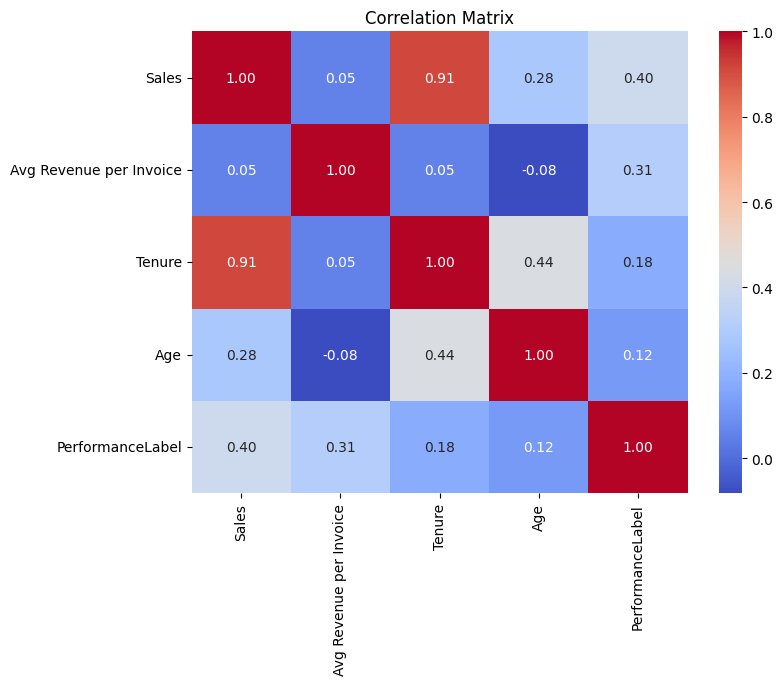

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Density plot

C:\Users\anmit\AppData\Local\Temp\ipykernel_9360\309353800.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=axes[i])
C:\Users\anmit\AppData\Local\Temp\ipykernel_9360\309353800.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=axes[i])
C:\Users\anmit\AppData\Local\Temp\ipykernel_9360\309353800.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=axes[i])
C:\Users\anmit\AppData\Local\Temp\ipykernel_9360\309353800.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabo

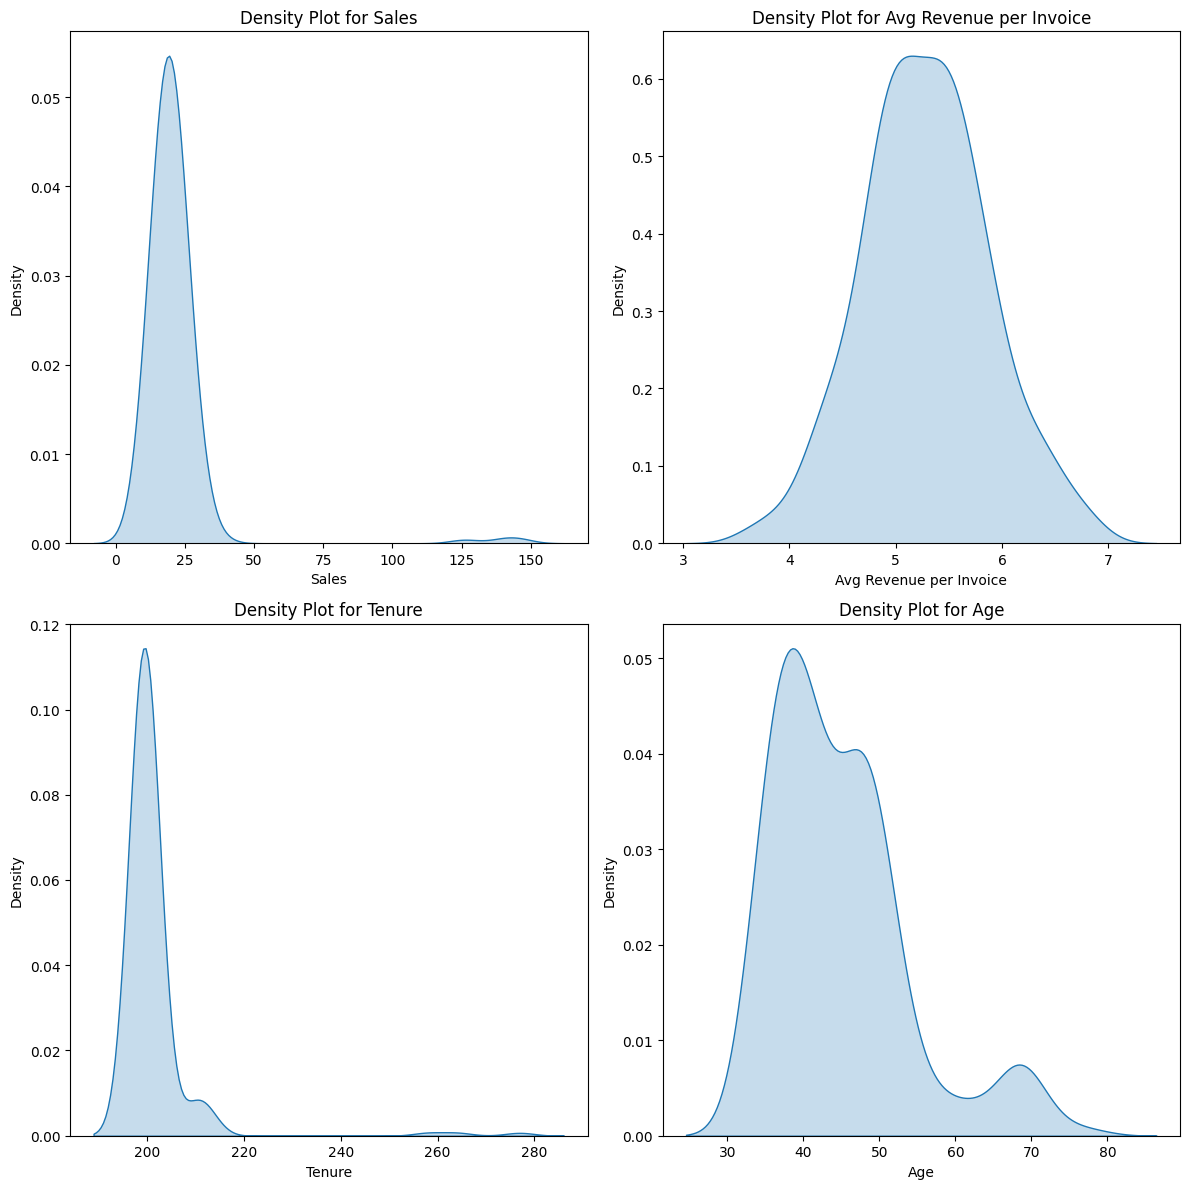

In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots
num_vars = len(numeric_columns)
rows = (num_vars + 1) // 2  # Calculate the number of rows (2 plots per row)
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes to make it easier to iterate

# Plot each variable
for i, column in enumerate(numeric_columns):
    sns.kdeplot(df[column], shade=True, ax=axes[i])
    axes[i].set_title(f'Density Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Q-Q plot 

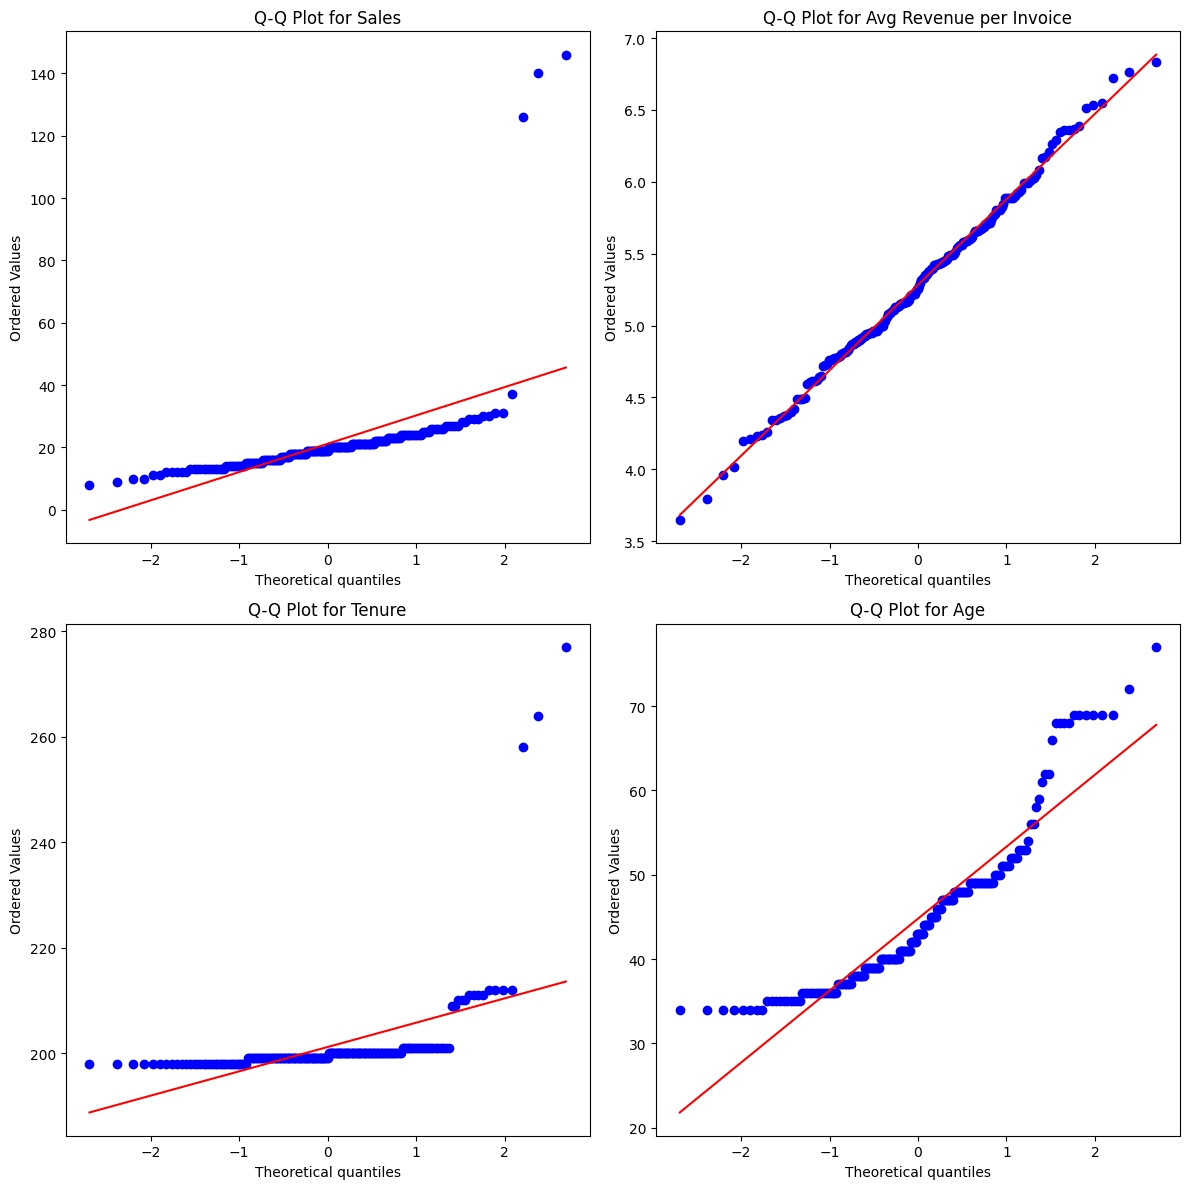

In [11]:
import scipy.stats as stats


fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes to make it easier to iterate

# Plot Q-Q plots for each numeric variable
for i, column in enumerate(numeric_columns):
    stats.probplot(df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {column}')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Splitting into inputs and outputs

In [13]:
y = df['PerformanceLabel']
x = df.drop(columns=['PerformanceLabel'])
print(x.head())

   Sales  Avg Revenue per Invoice  Tenure  Age
0    146                 5.705753     277   51
1    140                 5.538571     264   77
2    126                 5.715555     258   59
3     16                 5.353125     212   69
4     20                 5.089000     212   69


Standardisation

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

x = pd.DataFrame(x, columns=['Sales', 'Avg Revenue per Invoice', 'Tenure', 'Age'])
x

,Sales,Avg Revenue per Invoice,Tenure,Age
0,8.144906,0.717094,8.683725,0.687363
1,7.753389,0.433330,7.194936,3.569854
2,6.839847,0.733732,6.507802,1.574283
3,-0.337977,0.118566,1.239777,2.682933
4,-0.076965,-0.329742,1.239777,2.682933
...,...,...,...,...
190,-0.142218,-1.073087,-0.363535,-0.975612
191,-0.142218,-0.676447,-0.363535,-0.864747
192,-0.337977,1.099838,-0.363535,-0.643017
193,-0.468483,-0.342594,-0.363535,-1.197342


Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes to ensure correct splitting
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (156, 4)
X_test shape: (39, 4)
y_train shape: (156,)
y_test shape: (39,)


Training the models

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter for convergence
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

#XGBoost

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)




# Print the accuracies
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)



Decision Tree Accuracy: 0.8205128205128205
Random Forest Accuracy: 0.9487179487179487
SVM Accuracy: 0.7435897435897436
Logistic Regression Accuracy: 0.8717948717948718
Naive Bayes Accuracy: 0.5897435897435898
XGBoost Accuracy: 0.8974358974358975


Cross Validation on RF, LR and XGBoost

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# List of models to perform 5-fold cross-validation on
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000),  # Increased max_iter for convergence
    'XGBoost': XGBClassifier(random_state=42)
}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    # Get the cross-validation scores (accuracy scores for each fold)
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    # Calculate the average accuracy across all folds
    mean_cv_accuracy = cv_scores.mean()
    # Print the average cross-validation accuracy
    print(f"{model_name} 5-Fold Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")


Random Forest 5-Fold Cross-Validation Accuracy: 0.8653
Logistic Regression 5-Fold Cross-Validation Accuracy: 0.8651
XGBoost 5-Fold Cross-Validation Accuracy: 0.8718


Hyperparameter Tuning with GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define parameter grids for each model
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'random_state': [42]
}

# Create models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
xgb_model = XGBClassifier(random_state=42)

# Perform GridSearchCV for each model
# For Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(x_train, y_train)
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
print("Best Random Forest Accuracy:", rf_grid_search.best_score_)

# For Logistic Regression
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid_search.fit(x_train, y_train)
print("Best Logistic Regression Hyperparameters:", lr_grid_search.best_params_)
print("Best Logistic Regression Accuracy:", lr_grid_search.best_score_)

# For XGBoost
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid_search.fit(x_train, y_train)
print("Best XGBoost Hyperparameters:", xgb_grid_search.best_params_)
print("Best XGBoost Accuracy:", xgb_grid_search.best_score_)

# After hyperparameter tuning, you can use the best models to make predictions on the test set
best_rf_model = rf_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300, 'random_state': 42}
Best Random Forest Accuracy: 0.884475806451613
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Hyperparameters: {'C': 10, 'max_iter': 1000, 'solver': 'saga'}
Best Logistic Regression Accuracy: 0.9038306451612904
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'random_state': 42, 'subsample': 0.9}
Best XGBoost Accuracy: 0.9040322580645161


Fitting the final Logistic Regression model

Logistic Regression Performance:
Accuracy: 0.9487
Precision: 0.9556
Recall: 0.9487
F1-Score: 0.9486


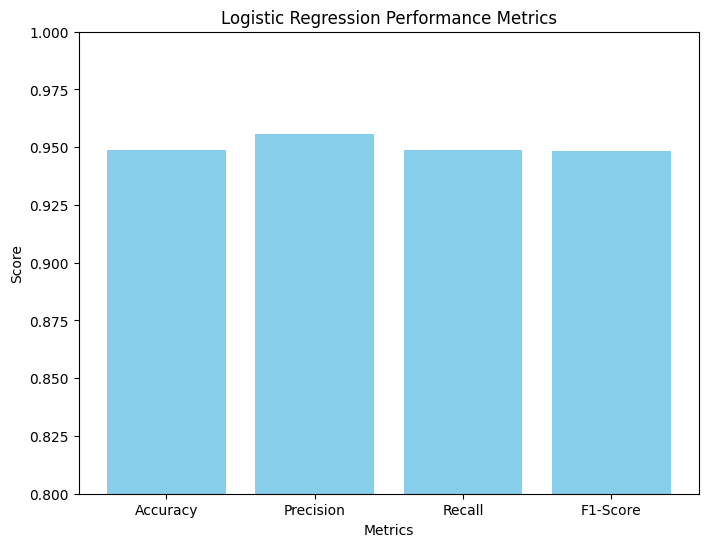

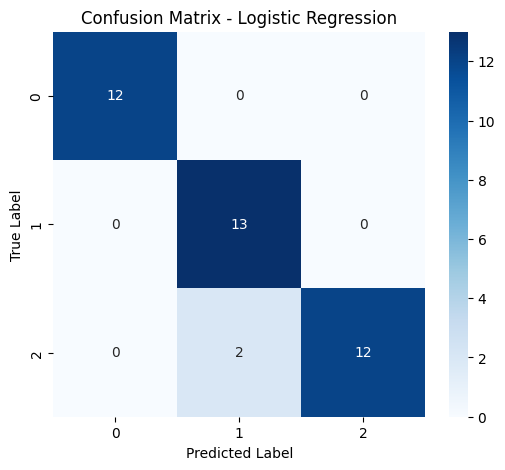

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Retrain Logistic Regression with the best hyperparameters
best_lr_model = lr_grid_search.best_estimator_

# Fit the model on the training data
best_lr_model.fit(x_train, y_train)

# Make predictions on the test data
lr_predictions = best_lr_model.predict(x_test)

# Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, lr_predictions)
precision = precision_score(y_test, lr_predictions, average='weighted')
recall = recall_score(y_test, lr_predictions, average='weighted')
f1 = f1_score(y_test, lr_predictions, average='weighted')

# Print the evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Performance metrics for plotting
metrics = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plot the bar chart for model performance metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics, color='skyblue')
plt.title('Logistic Regression Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim([0.8, 1])  # Set y-axis limit from 0.8 to 1
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Feature Importance

In [20]:


coefficients = best_lr_model.coef_[0]  # Only one set of coefficients since it's binary classification
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Compute odds ratio
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)



                   Feature  Coefficient  Odds Ratio
0                    Sales   -12.168033    0.000005
1  Avg Revenue per Invoice    -1.638839    0.194205
2                   Tenure     0.333025    1.395183
3                      Age    -0.146364    0.863843


VIF for collinearity


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF
X_scaled_df = pd.DataFrame(x, columns=x.columns)
vif_data = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'VIF': [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]
})
print(vif_data)
# high VIF values (more than 5) indicate multicollinearity
# Sales and Tenure have high VIF values as well as high correlation
#I will try now creating a combination feature called sales per tenure

                   Feature       VIF
0                    Sales  6.810022
1  Avg Revenue per Invoice  1.018532
2                   Tenure  7.842158
3                      Age  1.429850


In [22]:
df_coll = df.copy()

df_coll['Sales per Tenure'] = df_coll['Sales'] / (df_coll['Tenure']+ 1e-6)

df_coll = df_coll.drop(['Sales', 'Tenure'], axis=1)

y_coll = df_coll['PerformanceLabel']  # Assuming 'revenue' is the target column
X_coll = df_coll.drop('PerformanceLabel', axis=1)

print(X_coll.head())

   Avg Revenue per Invoice  Age  Sales per Tenure
0                 5.705753   51          0.527076
1                 5.538571   77          0.530303
2                 5.715555   59          0.488372
3                 5.353125   69          0.075472
4                 5.089000   69          0.094340


In [23]:
df_coll

,Avg Revenue per Invoice,Age,PerformanceLabel,Sales per Tenure
0,5.705753,51,2,0.527076
1,5.538571,77,2,0.530303
2,5.715555,59,2,0.488372
3,5.353125,69,0,0.075472
4,5.089000,69,1,0.094340
...,...,...,...,...
190,4.651052,36,0,0.095960
191,4.884736,37,1,0.095960
192,5.931250,39,1,0.080808
193,5.081428,34,0,0.070707


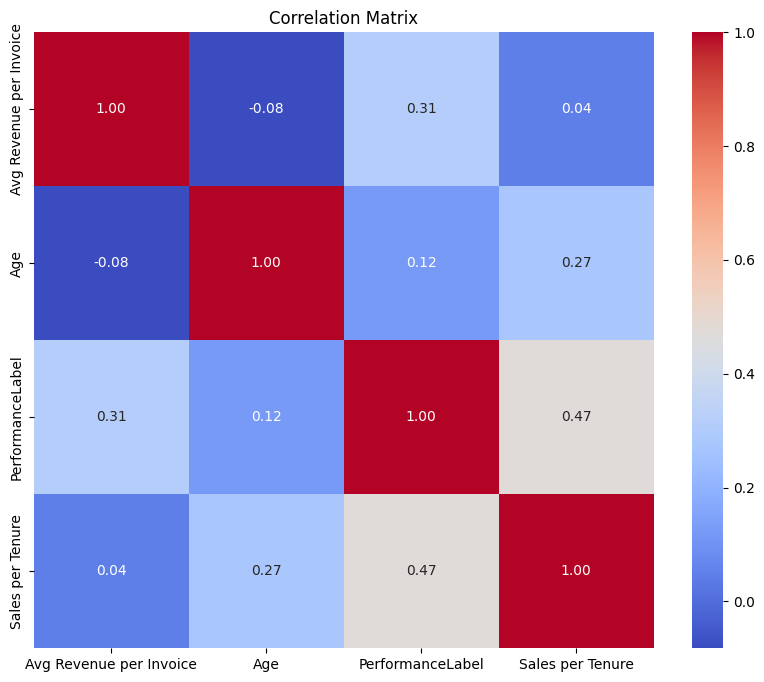

In [24]:
newcorr = df_coll.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(newcorr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
scaler = StandardScaler()
X_coll = scaler.fit_transform(X_coll)

X_coll = pd.DataFrame(X_coll, columns=['Avg Revenue per Customer', 'Age', 'Sales per Tenure'])
X_coll

,Avg Revenue per Customer,Age,Sales per Tenure
0,0.717094,0.687363,7.478220
1,0.433330,3.569854,7.535147
2,0.733732,1.574283,6.795494
3,0.118566,2.682933,-0.487979
4,-0.329742,2.682933,-0.155153
...,...,...,...
190,-1.073087,-0.975612,-0.126577
191,-0.676447,-0.864747,-0.126577
192,1.099838,-0.643017,-0.393846
193,-0.342594,-1.197342,-0.572026


In [26]:
x_train_coll, x_test_coll, y_train_coll, y_test_coll = train_test_split(X_coll, y_coll, test_size=0.2, random_state=42)

print("X_train shape:", x_train_coll.shape)
print("X_test shape:", x_test_coll.shape)
print("y_train shape:", y_train_coll.shape)
print("y_test shape:", y_test_coll.shape)

X_train shape: (156, 3)
X_test shape: (39, 3)
y_train shape: (156,)
y_test shape: (39,)


In [27]:
# Logistic Regression
lr_model_coll = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter for convergence
lr_model_coll.fit(x_train_coll, y_train_coll)
lr_predictions_coll = lr_model_coll.predict(x_test_coll)
lr_accuracy_coll = accuracy_score(y_test_coll, lr_predictions_coll)

print("Logistic Regression Accuracy with Sales per Tenure:", lr_accuracy_coll)


Logistic Regression Accuracy with Sales per Tenure: 0.9487179487179487


In [28]:

coefficients_coll = lr_model_coll.coef_[0]  # Only one set of coefficients since it's binary classification
feature_importance_coll = pd.DataFrame({
    'Feature': X_coll.columns,
    'Coefficient': coefficients_coll,
    'Odds Ratio': np.exp(coefficients_coll)  # Compute odds ratio
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance_coll)

                    Feature  Coefficient  Odds Ratio
2          Sales per Tenure    -4.488278    0.011240
0  Avg Revenue per Customer    -0.858410    0.423835
1                       Age    -0.100050    0.904792
